# Linear Regression

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
tickers = ['FB', 'AMZN', 'AAPL', 'HP', 'NVDA']

df_list = []
for ticker in tickers:
    df = pd.read_csv("ticker-" + ticker + ".csv", index_col=0, parse_dates=True)
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)
data.columns = tickers

In [5]:
data.tail()

,FB,AMZN,AAPL,HP,NVDA
Date,,,,,
2020-12-24,267.399994,3172.689941,131.970001,24.200001,519.750000
2020-12-28,277.000000,3283.959961,136.690002,23.680000,516.000000
2020-12-29,276.779999,3322.000000,134.869995,23.490000,517.729980
2020-12-30,271.869995,3285.850098,133.720001,23.580000,525.830017
2020-12-31,273.160004,3256.929932,132.690002,23.160000,522.200012


In [6]:
data = np.log(data/data.shift())

In [7]:
data.tail()

,FB,AMZN,AAPL,HP,NVDA
Date,,,,,
2020-12-24,-0.002652,-0.003957,0.007683,-0.012729,-0.001192
2020-12-28,0.035272,0.034470,0.035141,-0.021722,-0.007241
2020-12-29,-0.000795,0.011517,-0.013404,-0.008056,0.003347
2020-12-30,-0.017899,-0.010942,-0.008563,0.003824,0.015524
2020-12-31,0.004734,-0.008840,-0.007732,-0.017972,-0.006927


In [8]:
def lin_regr(ticker_a, ticker_b):
    # start from row 1 since 0th row has no values, change to numpy array 
    # and reshape it to have 1 entry for each row
    X = data[ticker_a].iloc[1:].values.reshape(-1,1)
    Y = data[ticker_b].iloc[1:].values.reshape(-1,1)
    # linear regression
    lin_regressor = LinearRegression()
    lin_regressor.fit(X, Y)
    # predict the Y values based on x in linear regression model
    Y_pred = lin_regressor.predict(X)
    
    # find alpha rounded to 5 digits
    alpha = str(round(lin_regressor.intercept_[0], 5))
    # find beta rounded to 5 digits
    beta = str(round(lin_regressor.coef_[0][0], 5))
    
    fig, ax = plt.subplots()
    ax.set_title('Alpha: ' + alpha + ', Beta: ' + beta)
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c= 'r')

<IPython.core.display.Javascript object>


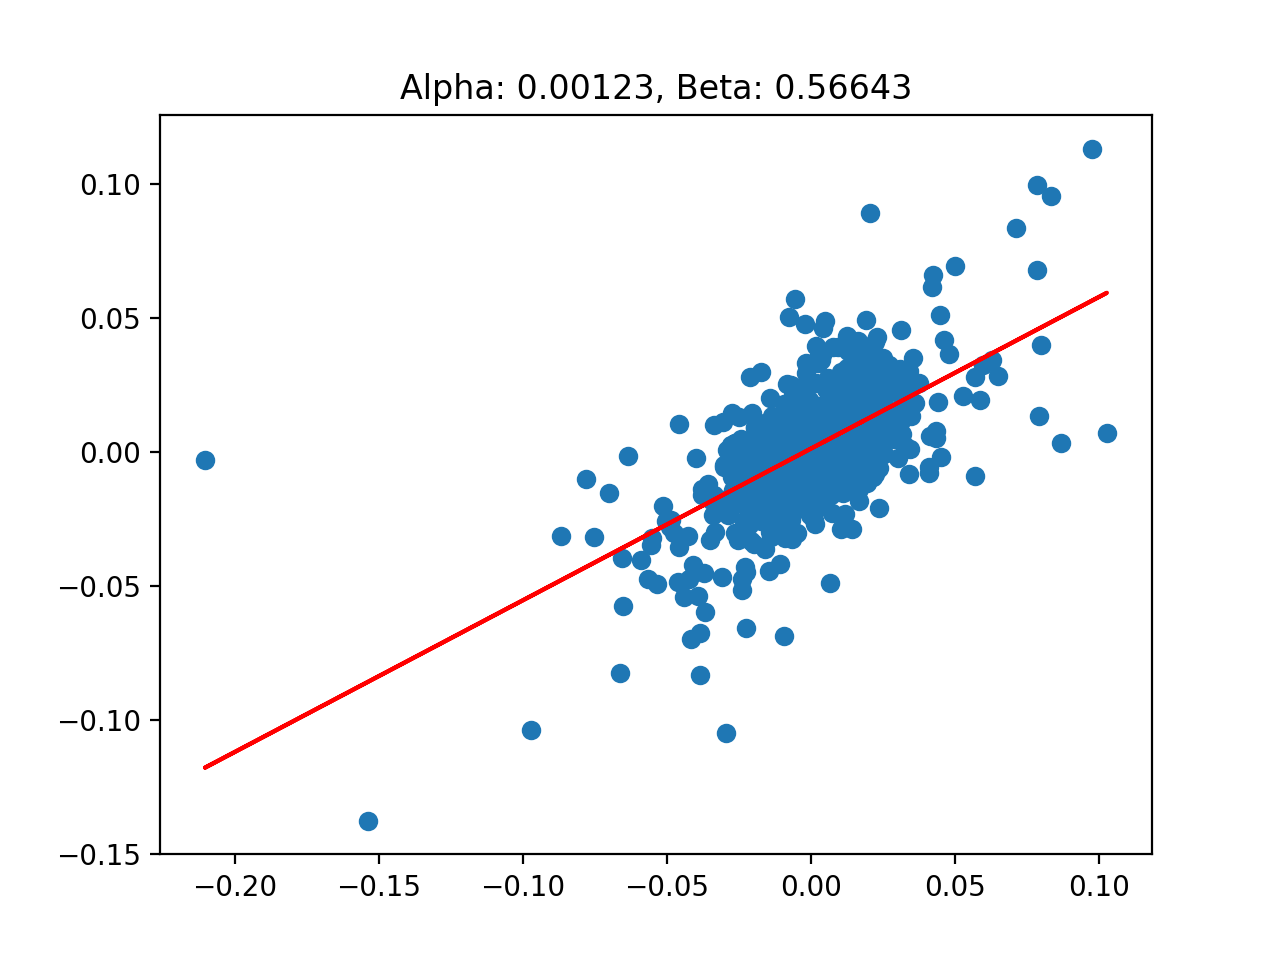

In [9]:
lin_regr('FB', 'AAPL')

<IPython.core.display.Javascript object>


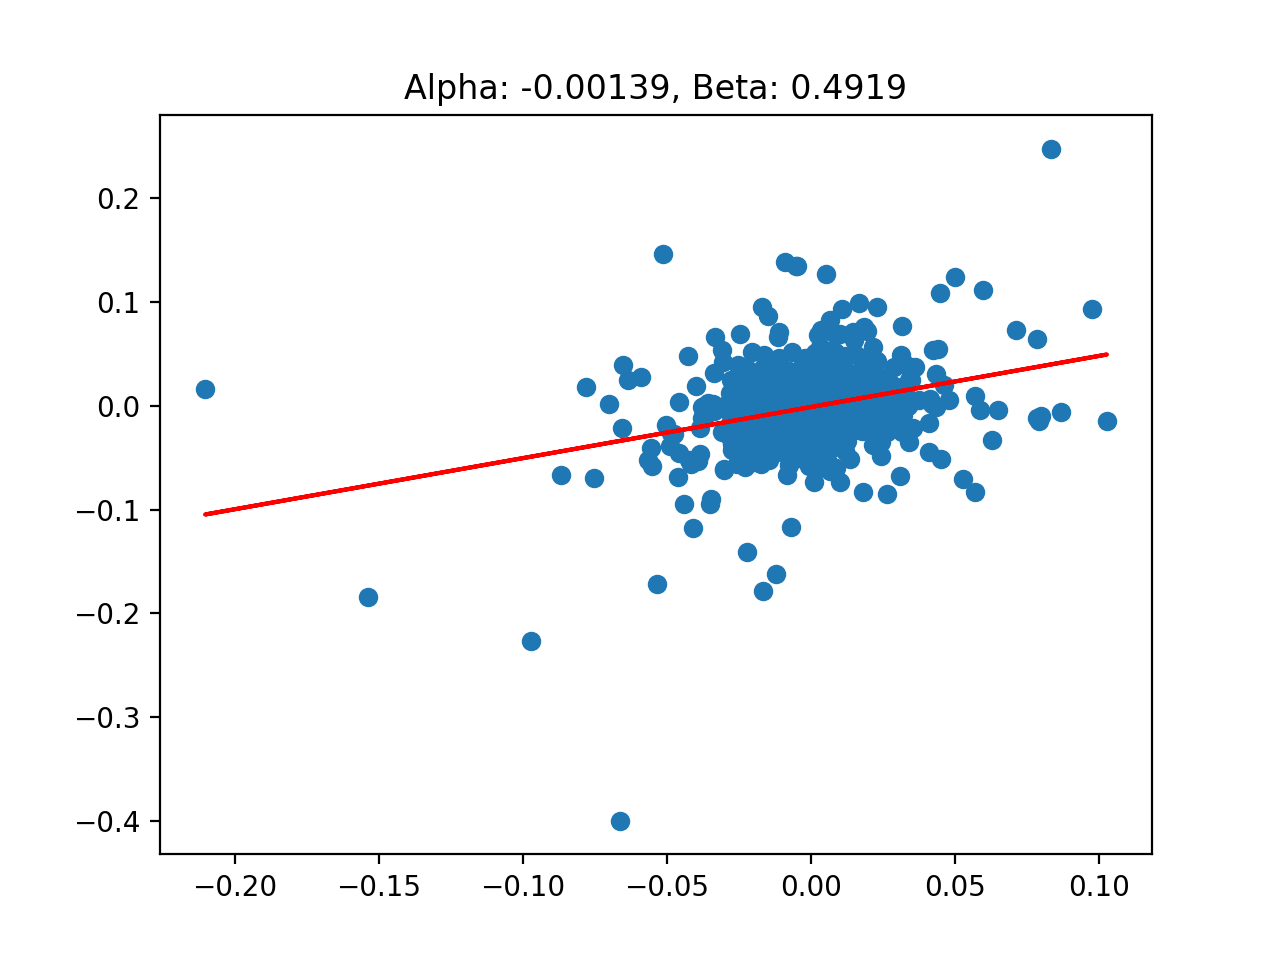

In [12]:
lin_regr('FB', 'HP')

In [13]:
def calc_beta(ticker_a, ticker_b):
    # start from row 1 since 0th row has no values, change to numpy array 
    # and reshape it to have 1 entry for each row
    X = data[ticker_a].iloc[1:].values.reshape(-1,1)
    Y = data[ticker_b].iloc[1:].values.reshape(-1,1)
    # linear regression
    lin_regressor = LinearRegression()
    lin_regressor.fit(X, Y)
    # predict the Y values based on x in linear regression model
    Y_pred = lin_regressor.predict(X)
    
    return lin_regressor.coef_[0][0]

In [14]:
calc_beta('FB', 'HP')

0.49190362301630924

In [15]:
import itertools
# empty dataframe to start with with tickers
df = pd.DataFrame(None, index = tickers, columns = tickers)
# take all combination of tickers and calulate beta value for all tickers
for t1, t2 in itertools.combinations(tickers, 2):
    df.loc[t1][t2] = calc_beta(t1, t2)
    df.loc[t2][t1] = calc_beta(t2, t1)
# diagonal of smae tickers
for t in tickers:
    df.loc[t][t] = calc_beta(t, t)

In [16]:
df

,FB,AMZN,AAPL,HP,NVDA
FB,1.0,0.545486,0.566428,0.491904,0.75991
AMZN,0.730375,1.0,0.696052,0.515556,0.966634
AAPL,0.67593,0.620349,1.0,0.705959,0.94555
HP,0.18387,0.143927,0.221133,1.0,0.292944
NVDA,0.442601,0.420485,0.461507,0.456463,1.0
